### Importando bibliotecas 

In [30]:
import cvxpy as cp
import numpy as np
import mosek
import matplotlib.pyplot as plt


## Resolução do problema 5 usando teorema de Fine

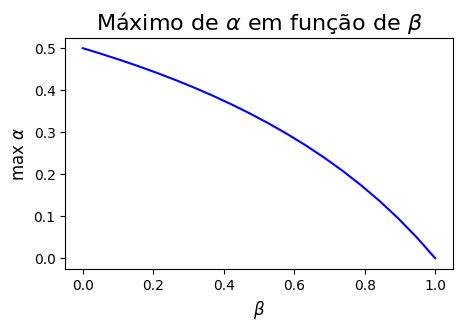

In [31]:
def getCoeffs(beta):
    _linGamma = 1/2 - beta - (1-beta)/4
    _indGamma = beta + (1-beta)/4
    _linDelta = 1/2 - (1-beta)/4
    _indDelta = (1-beta)/4
    _linEpsilon = - (1-beta)/4
    _indEpsilon = (1-beta)/4
    _linPhi = - beta - (1-beta)/4
    _indPhi = beta + (1-beta)/4

    linearCoeffs = [_linGamma, _linGamma, _linGamma, _linPhi,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linDelta, _linDelta, _linDelta, _linEpsilon]

    independentCoeffs = [_indGamma, _indGamma, _indGamma, _indPhi,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indDelta, _indDelta, _indDelta, _indEpsilon]
    
    return linearCoeffs, independentCoeffs

betas  = np.linspace(0, 1, 20)
alphas = []
for beta in betas:
    constraints = []

    alpha = cp.Variable(shape=1)
    # constraints += [alpha >= 0, alpha <= 1]
    constraints += [alpha <= 1]

    # Computes values for the coefficients on the p(ab|xy) distribution given in the exercise
    linearCoeffs, independentCoeffs = getCoeffs(beta)

    p=[]
    for i in range(16):
        p += [cp.Variable(shape=1, name="joint_"+format(i, '04b'))]
        constraints += [p[i] >= 0]


    # Iterates through all of the total behavior components: p(a, b | x, y)
    for i in range(16):
        # binary digits of i are abxy
        binaryIndex = format(i, '04b')
        aBehavior = binaryIndex[0]
        bBehavior = binaryIndex[1]
        x = int(binaryIndex[2])
        y = int(binaryIndex[3])

        marginalSum = []
        # Iterates through all of the joint distribution components: p(a0, a1, b0, b1)
        for j in range(16):
            aJoint = format(j, '04b')[0:2]
            bJoint = format(j, '04b')[2:]
            # when x is zero, take the 0th "a" component from the joint distribution, same for b and y
            if aJoint[x] == aBehavior and bJoint[y] == bBehavior:
                marginalSum += [p[j]]
        
        constraints += [linearCoeffs[i]*alpha + independentCoeffs[i] == cp.sum(marginalSum)]


    # Probability distribution sums to one
    constraints += [cp.sum(p) == 1]

    objective = cp.Maximize(alpha)
    problem = cp.Problem(objective=objective, constraints=constraints)

    resultado = problem.solve(solver="MOSEK", verbose=False)
    if(resultado != None):
        optimalPoint = alpha.value
        alphas += [optimalPoint]
        optimumDistribution = [p[i].value for i in range(16)]
        # print("Optimum found at alpha = {}".format(optimalPoint))
        # print("Joint distribution values: {}".format(optimumDistribution))
    else:
        print("Infeasible or unbounded problem.")  


plt.figure(figsize=(5, 3))
plt.plot(betas, alphas, color='blue')  

plt.title(r'Máximo de $\alpha$ em função de $\beta$', fontsize=16)  
plt.ylabel(r'max $\alpha$', fontsize=12)  
plt.xlabel(r'$\beta$', fontsize=12)  

plt.show()

In [32]:
alphasFine = alphas

## Resolução do problema da lista 8 usando NPA

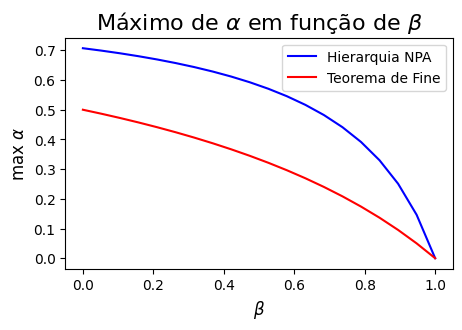

In [34]:
def getCoeffs(beta):
    _linGamma = 1/2 - beta - (1-beta)/4
    _indGamma = beta + (1-beta)/4
    _linDelta = 1/2 - (1-beta)/4
    _indDelta = (1-beta)/4
    _linEpsilon = - (1-beta)/4
    _indEpsilon = (1-beta)/4
    _linPhi = - beta - (1-beta)/4
    _indPhi = beta + (1-beta)/4

    linearCoeffs = [_linGamma, _linGamma, _linGamma, _linPhi,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linDelta, _linDelta, _linDelta, _linEpsilon]

    independentCoeffs = [_indGamma, _indGamma, _indGamma, _indPhi,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indDelta, _indDelta, _indDelta, _indEpsilon]
    
    return linearCoeffs, independentCoeffs

betas  = np.linspace(0, 1, 20)
alphas = []
for beta in betas:
    constraints = []

    alpha = cp.Variable(shape=1)
    # constraints += [alpha >= 0, alpha <= 1]
    constraints += [alpha <= 1]

    # Computes values for the coefficients on the p(ab|xy) distribution given in the exercise
    linearCoeffs, independentCoeffs = getCoeffs(beta)


    # x = cp.Variable(shape=1)
    # y = cp.Variable(shape=1)
    # gamma = [[0 for i in range(5)] for j in range(5)]
    gamma = cp.Variable(shape = (5,5))

    constraints += [gamma[0][1] == (linearCoeffs[0] + linearCoeffs[4])*alpha + independentCoeffs[0] + independentCoeffs[4]]
    constraints += [gamma[0][2] == (linearCoeffs[2] + linearCoeffs[6])*alpha + independentCoeffs[2] + independentCoeffs[6]]
    constraints += [gamma[0][3] == (linearCoeffs[0] + linearCoeffs[8])*alpha + independentCoeffs[0] + independentCoeffs[8]]
    constraints += [gamma[0][4] == (linearCoeffs[1] + linearCoeffs[9])*alpha + independentCoeffs[1] + independentCoeffs[9]]

    constraints += [gamma[1][1] == (linearCoeffs[0] + linearCoeffs[4])*alpha + independentCoeffs[0] + independentCoeffs[4]]
    constraints += [gamma[2][2] == (linearCoeffs[2] + linearCoeffs[6])*alpha + independentCoeffs[2] + independentCoeffs[6]]
    constraints += [gamma[3][3] == (linearCoeffs[0] + linearCoeffs[8])*alpha + independentCoeffs[0] + independentCoeffs[8]]
    constraints += [gamma[4][4] == (linearCoeffs[1] + linearCoeffs[9])*alpha + independentCoeffs[1] + independentCoeffs[9]]

    constraints += [gamma[1][3] == linearCoeffs[0]*alpha + independentCoeffs[0]] 
    constraints += [gamma[1][4] == linearCoeffs[1]*alpha + independentCoeffs[1]] 
    constraints += [gamma[2][3] == linearCoeffs[2]*alpha + independentCoeffs[2]] 
    constraints += [gamma[2][4] == linearCoeffs[3]*alpha + independentCoeffs[3]] 

    constraints += [gamma[0][0] == 1]
   
    for i in range(5):
        for j in range(5):
            if i > j:
                constraints += [gamma[i][j] == gamma[j, i]]

    # Constraints
    constraints += [gamma >> 0]

    objective = cp.Maximize(alpha)
    problem = cp.Problem(objective=objective, constraints=constraints)

    resultado = problem.solve(solver="MOSEK", verbose=False)
    if(resultado != None):
        optimalPoint = alpha.value
        alphas += [optimalPoint]
        # print("Optimum found at alpha = {}".format(optimalPoint))
        # print("Joint distribution values: {}".format(optimumDistribution))
    else:
        print("Infeasible or unbounded problem.")  


plt.figure(figsize=(5, 3))
plt.plot(betas, alphas, color='blue', label="Hierarquia NPA")  
plt.plot(betas, alphasFine, color='red', label="Teorema de Fine")  

plt.title(r'Máximo de $\alpha$ em função de $\beta$', fontsize=16)  
plt.ylabel(r'max $\alpha$', fontsize=12)  
plt.xlabel(r'$\beta$', fontsize=12)     

plt.legend()

plt.show()
